## Exploratory Data analysis

---

### Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.


---

A data of 7,000 customers is available. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

---

In [441]:
##importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
%matplotlib inline

In [159]:
###Loading the Dataset
data_init = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
##Print first 5 rows
data_init.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data analysis

In [440]:
data_copy = data_init.copy()

### Variable target : Churn

---

In [12]:
data_copy.shape

(7043, 21)

In [13]:
##Getting information about the dataset
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [15]:
##Describe the dataset
data_copy.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6168-WFVVF,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Quantitative : 3 , Qualitative: 18

In [17]:
## Missing values
data_copy.isnull().sum().values.sum()

0

In [18]:
data_copy.drop('customerID', axis = 1, inplace = True)

### How big is churn compared to the existing customer base?

In [23]:
print(data_copy['Churn'].value_counts())
print(data_copy['Churn'].value_counts(normalize = True))

No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


### 26.537% of churn

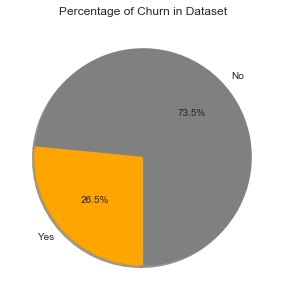

In [452]:
# Data to plot
sizes = data_copy['Churn'].value_counts(sort = True)
colors = ["grey","orange"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, labels = ['No','Yes'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

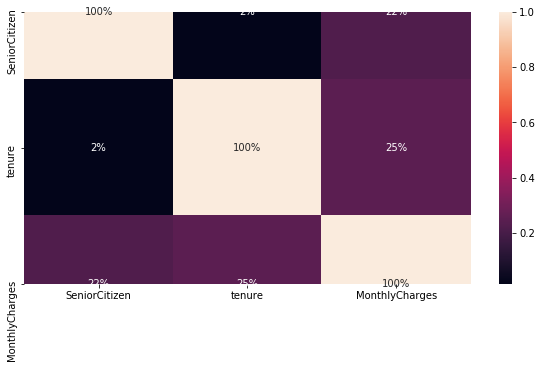

In [25]:
#Plot a correlation map for all numeric variables
plt.subplots(figsize=(10, 5))
sns.heatmap(data_copy.corr(), annot=True, fmt = '.0%')

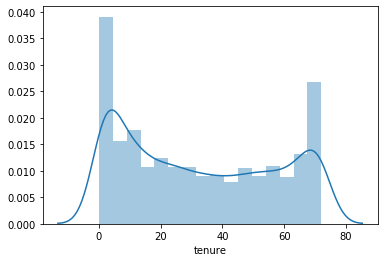

In [27]:
plt.figure()
sns.distplot(data_copy['tenure'])

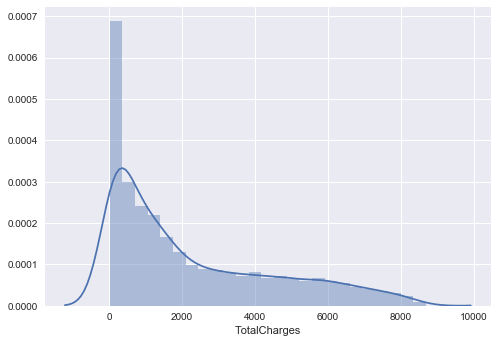

In [397]:
#Replacing spaces with null values in total charges column
data_copy['TotalCharges'] = data_copy["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain 
data_copy = data_copy[data_copy["TotalCharges"].notnull()]
data_copy = data_copy.reset_index()[data_copy.columns]
data_copy["TotalCharges"] = data_copy["TotalCharges"].astype(float)
plt.figure()
sns.distplot(data_copy['TotalCharges'])

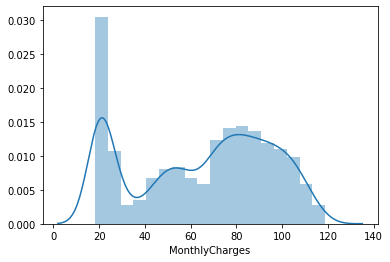

In [28]:
plt.figure()
sns.distplot(data_copy['MonthlyCharges'])

In [34]:
for col in data_copy.select_dtypes('object'):
    print(f'{col :-<30} {data_copy[col].unique()}')

gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn------------------------- ['No' 'Yes']


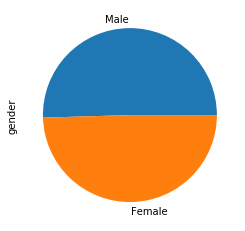

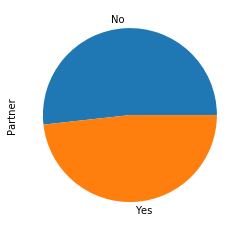

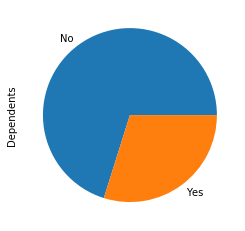

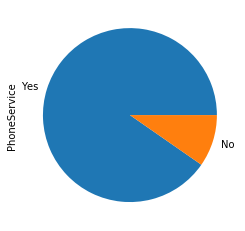

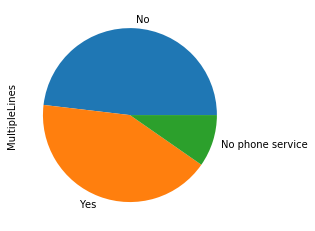

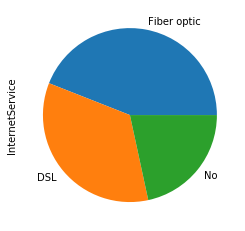

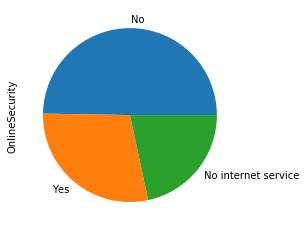

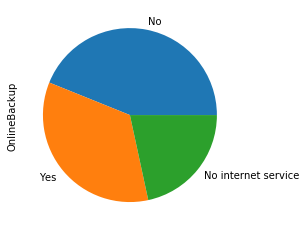

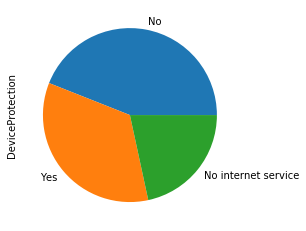

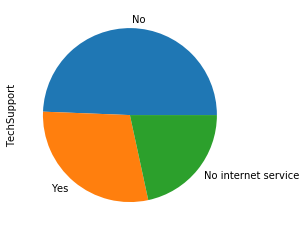

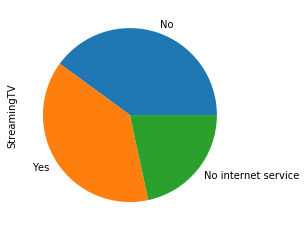

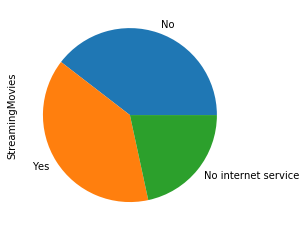

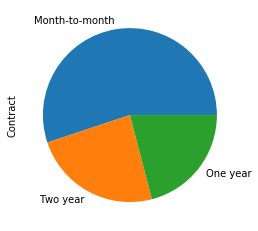

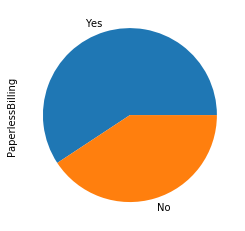

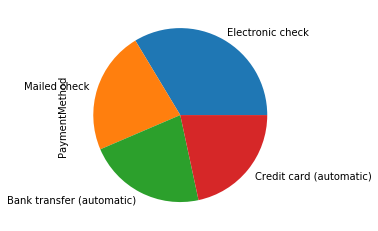

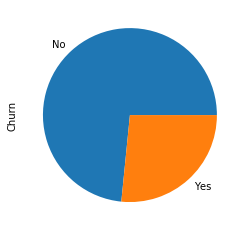

In [38]:
for col in data_copy.select_dtypes('object'):
    plt.figure()
    data_copy[col].value_counts().plot.pie()

In [241]:
data_churn_No = data_copy[data_copy['Churn'] == 0]
display(data_churn_No.head())
data_churn_Yes = data_copy[data_copy['Churn'] == 1]
display(data_churn_Yes.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


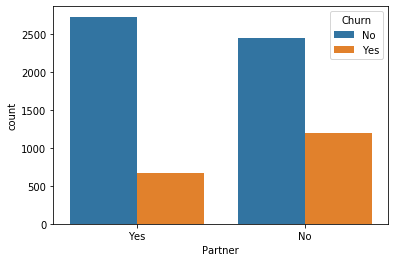

In [61]:
sns.countplot(x = 'Partner', hue = 'Churn', data = data_copy)

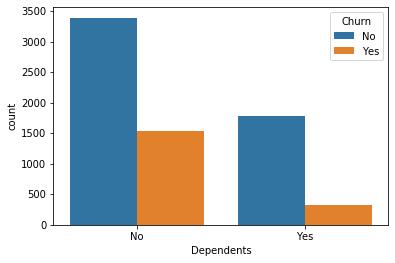

In [62]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = data_copy)

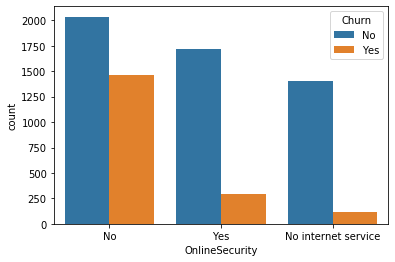

In [64]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = data_copy)

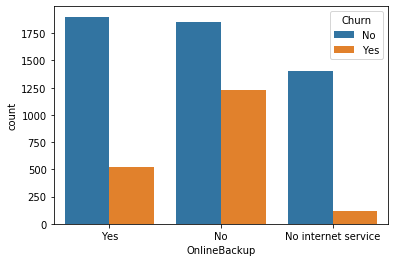

In [65]:
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = data_copy)

Churn
No     316530.15
Yes    139130.85
Name: MonthlyCharges, dtype: float64


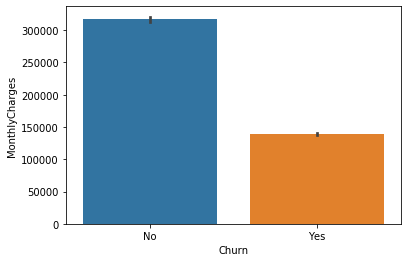

In [68]:
data_charge=data_copy.groupby(by='Churn').sum()['MonthlyCharges']
print(data_charge)
sns.barplot(x=data_copy['Churn'],y=data_copy['MonthlyCharges'],estimator=sum)

In [78]:
data_copy['TotalCharges'].fillna(data_copy['MonthlyCharges'], inplace=True)


In [154]:
data_copy['Churn'] = data_copy.Churn.replace({'Yes': 1, 'No': 0})

In [82]:
#The mininum value in Monthly Charges
display(data_copy['MonthlyCharges'].min())
#the maximum value in Monthly Charges
display(data_copy['MonthlyCharges'].max())
#The mean Monthly Charges of Churn Customers
display(round(data_copy[data_copy['Churn'] != 0]['MonthlyCharges'].mean(),2))
#The mean Monthly Charges of Non-churn Customers 
display(round(data_copy[data_copy['Churn'] == 0]['MonthlyCharges'].mean(),2))

18.25

118.75

74.44

61.31

In [83]:
#Total Amount of Monthly Charges by each group
print(round(data_copy.groupby('Churn')['MonthlyCharges'].sum() ))

Churn
0    316530.0
1    139131.0
Name: MonthlyCharges, dtype: float64


In [273]:
data_enc = data_init.copy()
# Transform categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
for col in data_enc.select_dtypes('object'):
    data_enc[col] = LabelEncoder().fit_transform(data_enc[col])
    data_enc[col] = LabelEncoder().fit_transform(data_enc[col])

In [275]:
data_enc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [454]:
data_copy = data_init.copy()
data_copy['Churn'] = data_copy.Churn.replace({'Yes': 1, 'No': 0})

# Explain churn by the below categories. Are there any factors that combine to be especially impactful?

## Customer demographics like age and gender


In [161]:
data_copy['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

## 83.79 of customers are not Senior among 16.21% who are senior

In [243]:
pd.crosstab(data_churn_Yes.SeniorCitizen,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
SeniorCitizen,,
0,0.745318,0.745318
1,0.254682,0.254682
All,1.000000,1.000000


## We see that 74.53 % of churn are Younger among 25.46% of Senior, which is obvious because there are more customer who are Younger, so it is not really useful

,SeniorCitizen,Churn
0,0,0.236062
1,1,0.416813


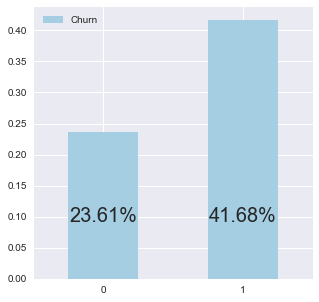

In [463]:
churn_demo = pd.DataFrame(data_copy.groupby('SeniorCitizen')[['Churn']].mean())
churn_demo.reset_index(level=0, inplace=True)
display(churn_demo)
churn_demo.plot.bar(y ='Churn', rot = 0, colormap = 'Paired')
for i in range(len(churn_demo['Churn'])):
       plt.text(i, 0.1, str(round(churn_demo['Churn'].values[i]*100,2))+"%", fontsize = 20, horizontalalignment='center', verticalalignment='center')

## now we can see Senior citizens are most to Churn than Younger, 23.61% of Younger Churn among 41.68% of Senior

# Gender

In [165]:
data_copy['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

##  we can see there are almost an equality of gender in the company 50.47% of man and 49.52% of woman

In [244]:
pd.crosstab(data_churn_Yes.gender,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
gender,,
Female,0.502408,0.502408
Male,0.497592,0.497592
All,1.000000,1.000000


## we can see than women are most to churn , but there is not big difference, 50.24% for female and 49.76% for male, lets verify it's realy true

,gender,Churn
0,Female,0.269209
1,Male,0.261603


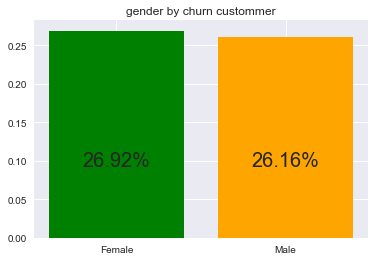

In [465]:
churn_demo = pd.DataFrame(data_copy.groupby('gender')[['Churn']].mean())
churn_demo.reset_index(level=0, inplace=True)
display(churn_demo)
churn_demo.set_index('gender', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_demo.index, churn_demo['Churn'], color = ['green','orange'])
plt.title('gender by churn custommer',size=12)
for i in range(len(churn_demo['Churn'])):
        plt.text(i, 0.1, str(round(churn_demo['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## Yes it's true female customers are more likely to churn, but the difference is minimal (~0.8%)

## Partner

In [182]:
data_copy['Partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

## 51.7% of customer have not a partner among 48.3% that have one

In [245]:
pd.crosstab(data_churn_Yes.Partner,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
Partner,,
No,0.642055,0.642055
Yes,0.357945,0.357945
All,1.000000,1.000000


## 64.21% of people who Churn have not a partner beside 35.97% that have one

,Partner,Churn
0,No,0.329580
1,Yes,0.196649


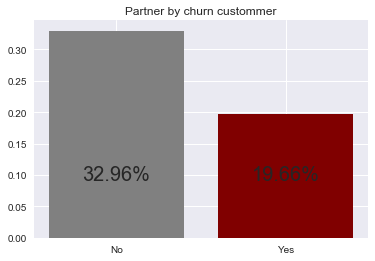

In [467]:
churn_demo = pd.DataFrame(data_copy.groupby('Partner')[['Churn']].mean())
churn_demo.reset_index(level=0, inplace=True)
display(churn_demo)
churn_demo.set_index('Partner', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_demo.index, churn_demo['Churn'], color = ['grey','maroon'])
plt.title('Partner by churn custommer',size=12)
for i in range(len(churn_demo['Churn'])):
        plt.text(i, 0.1, str(round(churn_demo['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## well , 19.66% of customer who have Partner Churn, beside 32.96% Whose don't have 

## Dependents

In [193]:
data_copy['Dependents'].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

## 29.96% of customer are dependents

In [246]:
pd.crosstab(data_churn_Yes.Dependents,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
Dependents,,
No,0.825575,0.825575
Yes,0.174425,0.174425
All,1.000000,1.000000


## 17.44% of Churn  are dependents, beside 82.56% are not

,Dependents,Churn,Count,percent_demo
0,No,0.312791,4933,0.700412
1,Yes,0.154502,2110,0.299588


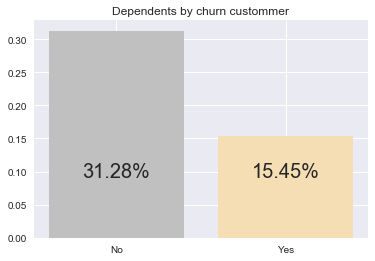

In [474]:
churn_demo = pd.DataFrame(data_copy.groupby('Dependents')[['Churn']].mean())
churn_demo["Count"]= data_copy.Dependents.value_counts(dropna=False)
churn_demo['percent_demo'] = churn_demo["Count"]/sum(churn_demo['Count'])
churn_demo.reset_index(level=0, inplace=True)
display(churn_demo)
churn_demo.set_index('Dependents', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_demo.index, churn_demo['Churn'], color = ['silver','wheat'])
plt.title('Dependents by churn custommer',size=12)
for i in range(len(churn_demo['Churn'])):
        plt.text(i, 0.1, str(round(churn_demo['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')


## 31.28% of no dependents customer Churn, beside 15.45% dependents customer

# Services used: 
### PhoneService	MultipleLines	InternetService	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies


In [211]:
data_copy['PhoneService'].value_counts(normalize=True)

1    0.903166
0    0.096834
Name: PhoneService, dtype: float64

## 90.32% of customer use Phone services, beside 9.68% do not use it

In [247]:
pd.crosstab(data_churn_Yes.PhoneService,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
PhoneService,,
No,0.090958,0.090958
Yes,0.909042,0.909042
All,1.000000,1.000000


## We can see the proportion of churn than use a phone service are very large than that not  use it respectively, 90.9% and 9.1% , that is pretty obvious because most customer use it as we saw before, lets then verify

,PhoneService,Churn
0,No,0.249267
1,Yes,0.267096


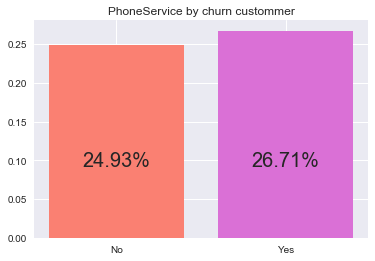

In [478]:
churn_services = pd.DataFrame(data_copy.groupby('PhoneService')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('PhoneService', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['salmon','orchid'] )
plt.title('PhoneService by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## Now we can say the difference is not really significant, there are 26.71% of people that use a phone service Who Churn beside 24.93% that not use it

In [220]:
data_copy['MultipleLines'].value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

## Only 9.68% of customer dont use a phone service on multiple lines

In [248]:
pd.crosstab(data_churn_Yes.MultipleLines,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
MultipleLines,,
No,0.454254,0.454254
No phone service,0.090958,0.090958
Yes,0.454789,0.454789
All,1.000000,1.000000


## Now we see 9.1% of people who churn don't use a phone service on multiple lines, which is enough interesting . Let's take a look

,MultipleLines,Churn
0,No,0.250442
1,No phone service,0.249267
2,Yes,0.286099


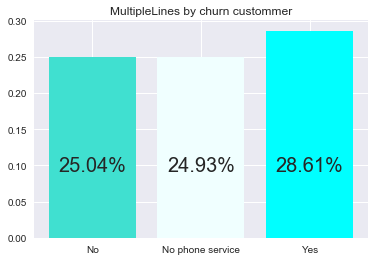

In [480]:
churn_services = pd.DataFrame(data_copy.groupby('MultipleLines')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('MultipleLines', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['turquoise','azure', 'aqua'] )
plt.title('MultipleLines by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## no great difference, but it seems that there is more people that use a multiple lines service who Churn : then 28.61%

In [237]:
data_copy['InternetService'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

## as we see , 43.96% of customer use fiver Optique, 34.37% use DSL, and 21.67% don't use an interner Service

In [242]:
pd.crosstab(data_churn_Yes.InternetService,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
InternetService,,
DSL,0.245586,0.245586
Fiber optic,0.693954,0.693954
No,0.060460,0.060460
All,1.000000,1.000000


## There is a higher people who churn that use a fiber optic as a internet service, equal to 69.4%

,InternetService,Churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


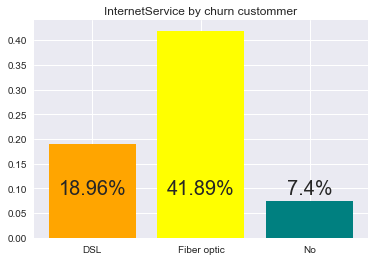

In [482]:
churn_services = pd.DataFrame(data_copy.groupby('InternetService')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('InternetService', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['orange','yellow', 'teal'] )
plt.title('InternetService by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## Ye that true people that use a fiber optic are more to Churn, there are 41.9% of customer that use fiber optic as internet service who churn

In [258]:

data_copy['OnlineSecurity'].value_counts(normalize=True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

In [259]:
pd.crosstab(data_churn_Yes.OnlineSecurity,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
OnlineSecurity,,
No,0.781701,0.781701
No internet service,0.060460,0.060460
Yes,0.157838,0.157838
All,1.000000,1.000000


## interesting, there are 78.17% of churn customer who don't use an online security

,OnlineSecurity,Churn
0,No,0.417667
1,No internet service,0.074050
2,Yes,0.146112


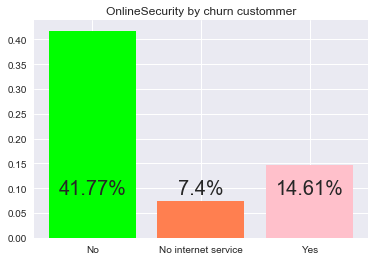

In [486]:
churn_services = pd.DataFrame(data_copy.groupby('OnlineSecurity')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('OnlineSecurity', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['lime','coral', 'pink'] )
plt.title('OnlineSecurity by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## 41.77% of customer who don't use a online security are churn customer

In [266]:
data_copy['OnlineBackup'].value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

In [267]:
pd.crosstab(data_churn_Yes.OnlineBackup,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
OnlineBackup,,
No,0.659711,0.659711
No internet service,0.060460,0.060460
Yes,0.279829,0.279829
All,1.000000,1.000000


## Again 65.97% of churn customer don't use an online backup

,OnlineBackup,Churn
0,No,0.399288
1,No internet service,0.074050
2,Yes,0.215315


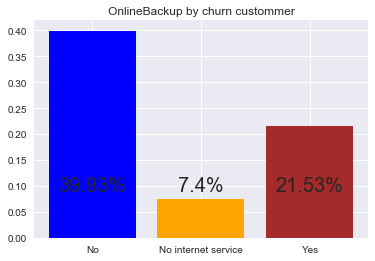

In [487]:
churn_services = pd.DataFrame(data_copy.groupby('OnlineBackup')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('OnlineBackup', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['blue','orange', 'brown'] )
plt.title('OnlineBackup by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## 39.93% of customer who don't use an online bnackup are churn customer

In [277]:
data_copy['DeviceProtection'].value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

In [278]:
pd.crosstab(data_churn_Yes.DeviceProtection,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
DeviceProtection,,
No,0.64794,0.64794
No internet service,0.06046,0.06046
Yes,0.29160,0.29160
All,1.00000,1.00000


## 64.79% of churn customer don't use an device protection

,DeviceProtection,Churn
0,No,0.391276
1,No internet service,0.074050
2,Yes,0.225021


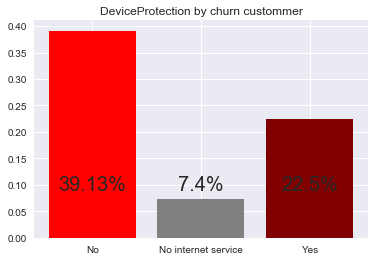

In [489]:
churn_services = pd.DataFrame(data_copy.groupby('DeviceProtection')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('DeviceProtection', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['red','grey', 'maroon'] )
plt.title('DeviceProtection by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## customer who don't use an device protection are more to churn, 39.13% of customer who don't use an device protection churn

In [284]:
data_copy['TechSupport'].value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

In [285]:
pd.crosstab(data_churn_Yes.TechSupport,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
TechSupport,,
No,0.773676,0.773676
No internet service,0.060460,0.060460
Yes,0.165864,0.165864
All,1.000000,1.000000


## 77.37% of churn customer don't have an TechSupport

,TechSupport,Churn
0,No,0.416355
1,No internet service,0.074050
2,Yes,0.151663


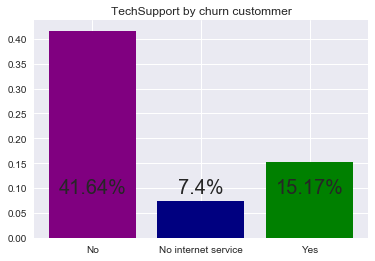

In [491]:
churn_services = pd.DataFrame(data_copy.groupby('TechSupport')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('TechSupport', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['purple','navy', 'green'] )
plt.title('TechSupport by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## Customer who don't have the service of tech Support are more to churn , 41.64% of customer who don't have an tech support are churn customer.

In [288]:
data_copy['StreamingTV'].value_counts(normalize=True)
 

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

In [290]:
pd.crosstab(data_churn_Yes.StreamingTV,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
StreamingTV,,
No,0.504013,0.504013
No internet service,0.060460,0.060460
Yes,0.435527,0.435527
All,1.000000,1.000000


## There are 50.4% of Churn customer who don't use streamingTV, beside 43.55% who use it

,StreamingTV,Churn
0,No,0.335231
1,No internet service,0.074050
2,Yes,0.300702


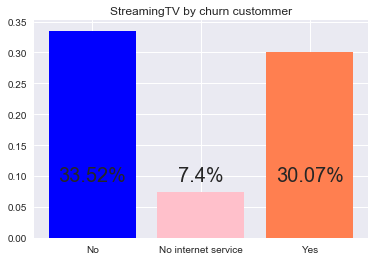

In [492]:
churn_services = pd.DataFrame(data_copy.groupby('StreamingTV')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('StreamingTV', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['blue','pink', 'coral'] )
plt.title('StreamingTV by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## customer who not use streaming TV are more to churn than customer who use it, though the difference is not really great, 33.52% and 30.07 respectively

In [293]:
data_copy['StreamingMovies'].value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

In [294]:
pd.crosstab(data_churn_Yes.StreamingMovies,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
StreamingMovies,,
No,0.501873,0.501873
No internet service,0.060460,0.060460
Yes,0.437667,0.437667
All,1.000000,1.000000


## There are 50.19% of Churn customer who don't use streamingMovies, beside 43.77% who use it

,StreamingMovies,Churn
0,No,0.336804
1,No internet service,0.074050
2,Yes,0.299414


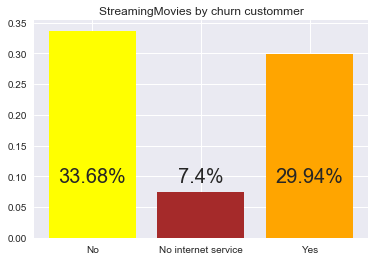

In [493]:
churn_services = pd.DataFrame(data_copy.groupby('StreamingMovies')[['Churn']].mean())
churn_services.reset_index(level=0, inplace=True)
display(churn_services)
churn_services.set_index('StreamingMovies', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_services.index, churn_services['Churn'], color = ['yellow','brown', 'orange'] )
plt.title('StreamingMovies by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_services['Churn'])):
        plt.text(i, 0.1, str(round(churn_services['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

In [301]:
#churn_services.set_index('StreamingMovies')

# Billing information:

### Contract	PaperlessBilling	PaymentMethod	MonthlyCharges	TotalCharges	


In [302]:
data_copy['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [303]:
pd.crosstab(data_churn_Yes.Contract,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
Contract,,
Month-to-month,0.885500,0.885500
One year,0.088818,0.088818
Two year,0.025682,0.025682
All,1.000000,1.000000


## Well we have a winner lolll, 88.55% of churn customer have a contract Month to month, though There are in general more contract month to month than the others, but it's enough interesting, we gonna look close

In [382]:
churn_billing = pd.DataFrame(data_copy.groupby('Contract')[['Churn']].mean())
churn_billing.reset_index(level=0, inplace=True)
display(churn_billing)
#pd.crosstab(churn_services.Contract, round(churn_services.Churn*100,2)).plot( kind = 'bar', colormap= 'Paired' )

,Contract,Churn
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


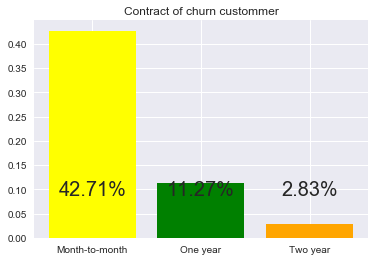

In [383]:
churn_billing.set_index('Contract', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_billing.index, churn_billing['Churn'], color = ['yellow','green','orange'])
plt.title('Contract of churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_billing['Churn'])):
        plt.text(i, 0.1, str(round(churn_billing['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

In [376]:
##churn_billing.plot.bar(y ='Churn', rot = 0, colormap = 'Oranges_r')
##for i in range(len(churn_billing['Churn'])):
 ##       plt.text(i, 0.1, str(round(churn_billing['Churn'].values[i]*100,2))+"%", horizontalalignment='center', verticalalignment='center')

## well it's true 42.71% of customer that have an contract of month to month are churn customer, a people that have an contract of two years are less to churn, which is understandable

In [378]:
data_copy['PaperlessBilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [380]:
pd.crosstab(data_churn_Yes.PaperlessBilling,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
PaperlessBilling,,
No,0.250936,0.250936
Yes,0.749064,0.749064
All,1.000000,1.000000


## 74.91% of churn customer use a paperless Billing

,PaperlessBilling,Churn
0,No,0.163301
1,Yes,0.335651


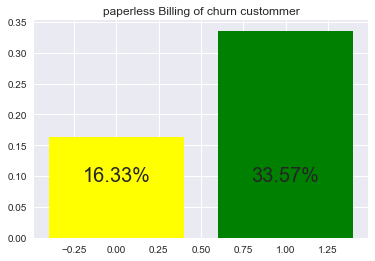

In [386]:
churn_billing = pd.DataFrame(data_copy.groupby('PaperlessBilling')[['Churn']].mean())
churn_billing.reset_index(level=0, inplace=True)
display(churn_billing)
#churn_billing.set_index('PaperlessBilling', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_billing.index, churn_billing['Churn'], color = ['yellow','green'] )
plt.title('paperless Billing of churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_billing['Churn'])):
        plt.text(i, 0.1, str(round(churn_billing['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## 33.57% of customer who use paperless Billing are churn customer


In [387]:
data_copy['PaymentMethod'].value_counts(normalize=True)


Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [388]:
pd.crosstab(data_churn_Yes.PaymentMethod,data_churn_Yes.Churn, normalize = True, margins = True)

Churn,1,All
PaymentMethod,,
Bank transfer (automatic),0.138042,0.138042
Credit card (automatic),0.124131,0.124131
Electronic check,0.573034,0.573034
Mailed check,0.164794,0.164794
All,1.000000,1.000000


## most of churn customer use electronick check as payment method, most of 57.3%n of churn customer

,PaymentMethod,Churn
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


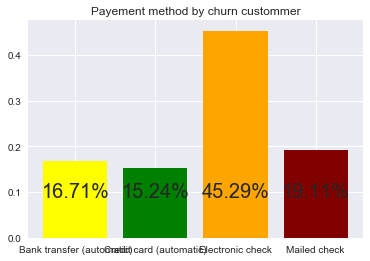

In [394]:
churn_billing = pd.DataFrame(data_copy.groupby('PaymentMethod')[['Churn']].mean())
churn_billing.reset_index(level=0, inplace=True)
display(churn_billing)
churn_billing.set_index('PaymentMethod', inplace =True)
ax1 = plt.figure(figsize=(6,4))
plt.bar(churn_billing.index, churn_billing['Churn'], color = ['yellow','green', 'orange', 'maroon'] )
plt.title('Payement method by churn custommer',size=12)
#plt.yticks([])
for i in range(len(churn_billing['Churn'])):
        plt.text(i, 0.1, str(round(churn_billing['Churn'].values[i]*100,2))+"%", fontsize = 20,horizontalalignment='center', verticalalignment='center')

## so we can see now 45.29% of customer who use electronic check as payment method are churn custommer

In [401]:

#MonthlyCharges	TotalCharges

In [427]:
data_enc = data_init.copy()
data_enc = data_enc.drop('customerID', axis = 1)
data_enc['Churn'] = data_enc.Churn.replace({'Yes': 1, 'No': 0})
#Replacing spaces with null values in total charges column
data_enc['TotalCharges'] = data_enc["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain 
data_enc = data_enc[data_enc["TotalCharges"].notnull()]
data_enc = data_enc.reset_index()[data_enc.columns]
data_enc["TotalCharges"] = data_enc["TotalCharges"].astype(float)
# Transform categorical values into numerical values
#from sklearn.preprocessing import LabelEncoder


for col in data_enc.select_dtypes('object'):
    data_enc = pd.get_dummies(data_enc, columns = [col])

In [428]:
data_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# tired , i am going to build a model for predicting churn, 
## i really appreciate the decision tree model, so i am gonna use it

In [425]:
## import libraries to build my model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [429]:
x = data_enc.drop(['Churn'], axis = 1)
y = data_enc['Churn']

In [430]:
## splitting Data into Training and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [431]:
## instance of the model
churn_Tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [432]:
## Train the model
churn_Tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [433]:
churn_Tree.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [434]:
churn_Tree.score(x_test,y_test)

0.7696245733788396

## well i have an accuracy of 77%, i would wish having better, but let's see what i get 

In [435]:
tree.export_graphviz(churn_Tree, out_file = 'tree.dot', feature_names = x_train.columns, filled = True)

# dot -Tpng tree.dot -o tree.png
## i will use that command to convert the dot file into png tom visualize what i get 

---

## let's build a new model in purpose to have a better accuracy, we are going to use logistic regression

In [436]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [437]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\Bob\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [438]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8102345415778252


# well we have an accuracy of 81% , it's better

In [439]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=x.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.563717
InternetService_Fiber optic                0.338947
PaymentMethod_Electronic check             0.254824
SeniorCitizen                              0.223834
OnlineSecurity_No                          0.216628
TechSupport_No                             0.210803
MultipleLines_No phone service             0.111472
PhoneService_No                            0.111472
StreamingTV_Yes                            0.079839
PaperlessBilling_Yes                       0.066341
OnlineBackup_No                            0.060179
StreamingMovies_Yes                        0.058487
DeviceProtection_No                        0.009194
MonthlyCharges                             0.003069
TotalCharges                               0.000257
Dependents_No                             -0.022403
DeviceProtection_Yes                      -0.035980
MultipleLines_Yes                         -0.039761
PaymentMethod_Bank transfer (automatic)   -0.051463
tenure      